<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,95.777469,0.094521,105.871990,105.824641,0.047349
1,0.0,1.0,70.085301,0.040995,80.126296,80.082333,0.043962
2,0.0,2.0,47.980688,-0.173042,57.807646,57.934582,-0.126936
3,0.0,3.0,85.883729,0.133312,96.017041,95.911593,0.105448
4,0.0,4.0,96.052277,-0.047950,106.004328,106.099985,-0.095658
...,...,...,...,...,...,...,...
19995,999.0,15.0,43.291787,-0.025280,53.266507,53.274483,-0.007977
19996,999.0,16.0,68.962836,-0.061905,78.900931,78.963075,-0.062144
19997,999.0,17.0,55.507030,0.060384,65.567414,65.498073,0.069340
19998,999.0,18.0,32.766539,-0.067832,42.698707,42.742043,-0.043336


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,95.777469,0.094521,105.871990,105.824641,0.047349
1,0.0,1.0,70.085301,0.040995,80.126296,80.082333,0.043962
2,0.0,2.0,47.980688,-0.173042,57.807646,57.934582,-0.126936
3,0.0,3.0,85.883729,0.133312,96.017041,95.911593,0.105448
4,0.0,4.0,96.052277,-0.047950,106.004328,106.099985,-0.095658
...,...,...,...,...,...,...,...
19995,999.0,15.0,43.291787,-0.025280,53.266507,53.274483,-0.007977
19996,999.0,16.0,68.962836,-0.061905,78.900931,78.963075,-0.062144
19997,999.0,17.0,55.507030,0.060384,65.567414,65.498073,0.069340
19998,999.0,18.0,32.766539,-0.067832,42.698707,42.742043,-0.043336


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    95.777469  0.094521  105.871990  105.824641  0.047349
      1.0    70.085301  0.040995   80.126296   80.082333  0.043962
      2.0    47.980688 -0.173042   57.807646   57.934582 -0.126936
      3.0    85.883729  0.133312   96.017041   95.911593  0.105448
      4.0    96.052277 -0.047950  106.004328  106.099985 -0.095658
...                ...       ...         ...         ...       ...
999.0 15.0   43.291787 -0.025280   53.266507   53.274483 -0.007977
      16.0   68.962836 -0.061905   78.900931   78.963075 -0.062144
      17.0   55.507030  0.060384   65.567414   65.498073  0.069340
      18.0   32.766539 -0.067832   42.698707   42.742043 -0.043336
      19.0   75.530694 -0.020923   85.509771   85.535421 -0.025650

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    95.777469  0.094521  105.871990  105.824641  0.047349
      1.0    70.085301  0.040995   80.126296   80.082333  0.043962
      2.0    47.980688 -0.173042   57.807646   57.934582 -0.126936
      3.0    85.883729  0.133312   96.017041   95.911593  0.105448
      4.0    96.052277 -0.047950  106.004328  106.099985 -0.095658
...                ...       ...         ...         ...       ...
999.0 15.0   43.291787 -0.025280   53.266507   53.274483 -0.007977
      16.0   68.962836 -0.061905   78.900931   78.963075 -0.062144
      17.0   55.507030  0.060384   65.567414   65.498073  0.069340
      18.0   32.766539 -0.067832   42.698707   42.742043 -0.043336
      19.0   75.530694 -0.020923   85.509771   85.535421 -0.025650

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,95.777469,0.094521,105.871990,105.824641,0.047349
1,0.0,1.0,70.085301,0.040995,80.126296,80.082333,0.043962
2,0.0,2.0,47.980688,-0.173042,57.807646,57.934582,-0.126936
3,0.0,3.0,85.883729,0.133312,96.017041,95.911593,0.105448
4,0.0,4.0,96.052277,-0.047950,106.004328,106.099985,-0.095658
...,...,...,...,...,...,...,...
19995,999.0,15.0,43.291787,-0.025280,53.266507,53.274483,-0.007977
19996,999.0,16.0,68.962836,-0.061905,78.900931,78.963075,-0.062144
19997,999.0,17.0,55.507030,0.060384,65.567414,65.498073,0.069340
19998,999.0,18.0,32.766539,-0.067832,42.698707,42.742043,-0.043336


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    95.777469  0.094521  105.871990  105.824641  0.047349
      1.0    70.085301  0.040995   80.126296   80.082333  0.043962
      2.0    47.980688 -0.173042   57.807646   57.934582 -0.126936
      3.0    85.883729  0.133312   96.017041   95.911593  0.105448
      4.0    96.052277 -0.047950  106.004328  106.099985 -0.095658
...                ...       ...         ...         ...       ...
999.0 15.0   43.291787 -0.025280   53.266507   53.274483 -0.007977
      16.0   68.962836 -0.061905   78.900931   78.963075 -0.062144
      17.0   55.507030  0.060384   65.567414   65.498073  0.069340
      18.0   32.766539 -0.067832   42.698707   42.742043 -0.043336
      19.0   75.530694 -0.020923   85.509771   85.535421 -0.025650

[20000 rows x 5 columns]

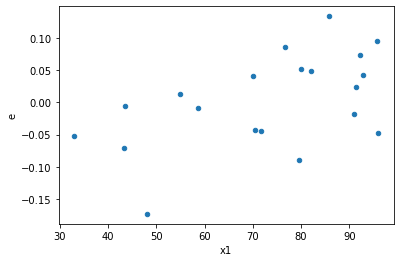

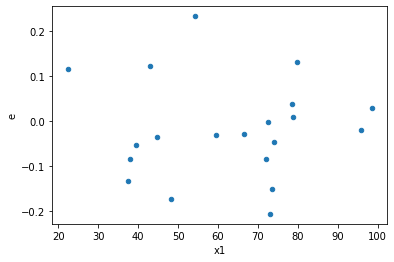

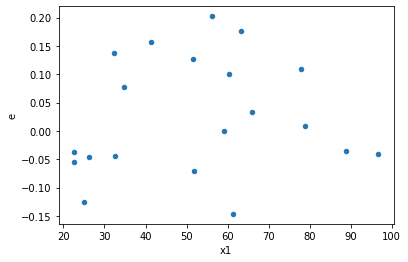

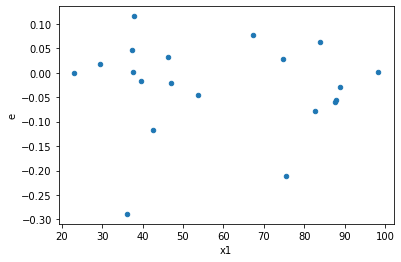

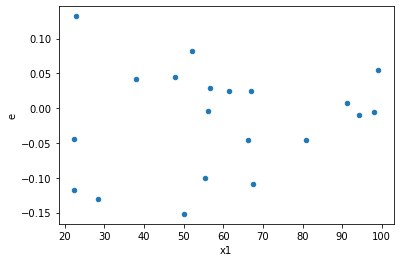

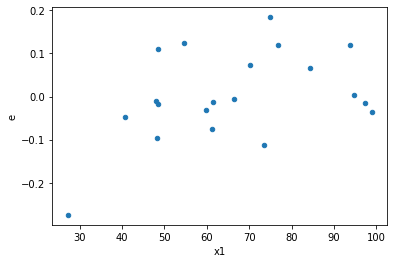

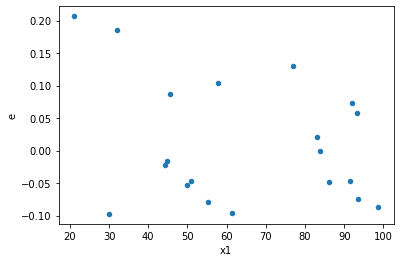

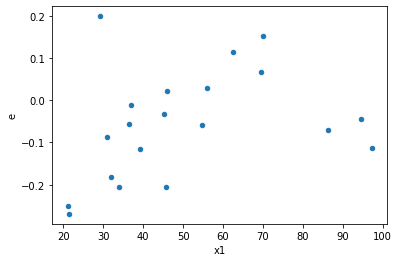

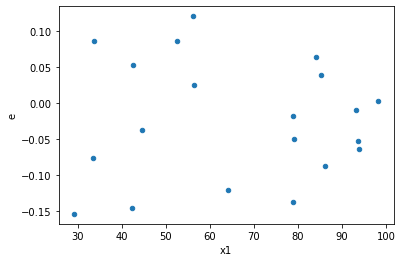

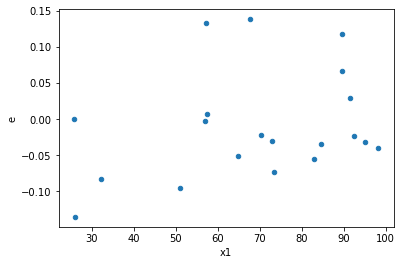

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,7.0,7.0,0.02505266673601517,0.06759049557595326,0.00357895239085931,0.009655785082279036,2.6979361633700503,0.21375707948827394,0.893121460255863,0.10687853974413697,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,0.04903971450306999,0.06334991757821198,0.0070056735004385695,0.009049988225458855,1.2918084499502163,0.7440909723397189,0.6279545138301406,0.37204548616985944,Reject001=1 : Homoscedasticity
24.0,7.0,7.0,0.03925050155677207,0.09191285179894353,0.005607214508110296,0.013130407399849076,2.3416987848168116,0.28412984325093626,0.8579350783745319,0.14206492162546813,Reject001=1 : Homoscedasticity
32.0,7.0,7.0,0.03681807123578784,0.04023172613923905,0.005259724462255406,0.005747389448462722,1.0927168314056896,0.9098910626877372,0.5450544686561314,0.4549455313438686,Reject001=1 : Homoscedasticity
40.0,7.0,7.0,0.017182324899932072,0.018340698017715,0.002454617842847439,0.0026200997168164286,1.0674165530292996,0.933628164317289,0.5331859178413555,0.4668140821586445,Reject001=1 : Homoscedasticity
41.0,7.0,7.0,0.03911852576378254,0.05169957867300448,0.005588360823397505,0.007385654096143497,1.3216136769875406,0.7222628255447334,0.6388685872276333,0.3611314127723667,Reject001=1 : Homoscedasticity
55.0,7.0,7.0,0.02040376460062375,0.03340792155174879,0.0029148235143748214,0.004772560221678399,1.6373410596359999,0.5310269488132804,0.7344865255933598,0.2655134744066402,Reject001=1 : Homoscedasticity
61.0,7.0,7.0,0.03614793073531433,0.04757767530096148,0.0051639901050449044,0.006796810757280211,1.316193605917281,0.7261781648618584,0.6369109175690708,0.3630890824309292,Reject001=1 : Homoscedasticity
65.0,7.0,7.0,0.028495570878409527,0.035409356173827226,0.00407079583977279,0.005058479453403889,1.242626663803957,0.7817384414324557,0.6091307792837721,0.39086922071622787,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.025147174377586106,0.021195609589483584,0.0035924534825123007,0.0030279442270690834,0.8428624731840813,0.8273421223408834,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,0.14091727177814006,0.06700290388642637,0.02013103882544858,0.009571843412346624,0.4754768740620783,0.3477909518964478,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.02505266673601517,0.06759049557595326,0.00357895239085931,0.009655785082279036,2.6979361633700503,0.21375707948827394,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,0.1033324026255173,0.04361324238148518,0.014761771803645327,0.006230463197355026,0.42206743744788494,0.27773394639698396,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.08003669919182796,0.012020615600224546,0.011433814170261137,0.0017172308000320778,0.15018879740922517,0.022958642753429338,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,0.04903971450306999,0.06334991757821198,0.0070056735004385695,0.009049988225458855,1.2918084499502163,0.7440909723397189,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,0.06072752832546605,0.022933190758735195,0.008675361189352294,0.0032761701083907423,0.3776407733215477,0.2221878848416633,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.13657655692870155,0.04589192248026719,0.019510936704100222,0.006555988925752455,0.3360161034387813,0.17347480662106346,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,0.05269614373149864,0.019217618495431722,0.007528020533071235,0.0027453740707759603,0.3646873781381571,0.2066337155918543,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      879
Reject001=0 : Heteroscedasticity    121
Name: Result_test, dtype: int64